In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the road accidents data 
road_acc = pd.read_csv('/Users/elorm/Documents/Repos/Datasets/road-accidents.csv', sep = '|', comment = '#')

#Loading the miles driven data
miles = pd.read_csv('/Users/elorm/Documents/Repos/Datasets/miles-driven.csv', sep = '|')

#Inspecting the first few rows of the datasets
road_acc.head(3)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96


- `drvr_fatl_col_bmiles` = Number of drivers involved in fatal collisions per billion miles (2011)',
- `perc_fatl_speed` = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)',
- `perc_fatl_alcohol` = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)',
- `perc_fatl_1st_time` = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)

In [3]:
miles.head(3)

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575


##### Getting familiar with the data
The scatterplot matrix will be used to explore the pairwise relationship between all columns in the data. This will enable us to get a more familirized with the data. This graphical overview, will give us a good representation of the distribution of the variables within the data.

In [6]:
# import seaborn and make plots appear inline
import seaborn as sns
%matplotlib inline

# Compute the summary statistics of all columns in the `car_acc` DataFrame
sum_stat_road_acc = road_acc.describe()
print(sum_stat_road_acc)

       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time  
count            51.00000  
mean             88.72549  
std               6.96011  
min              76.00000  
25%              83.50000  
50%              88.00000  
75%              95.00000  
max             100.00000  


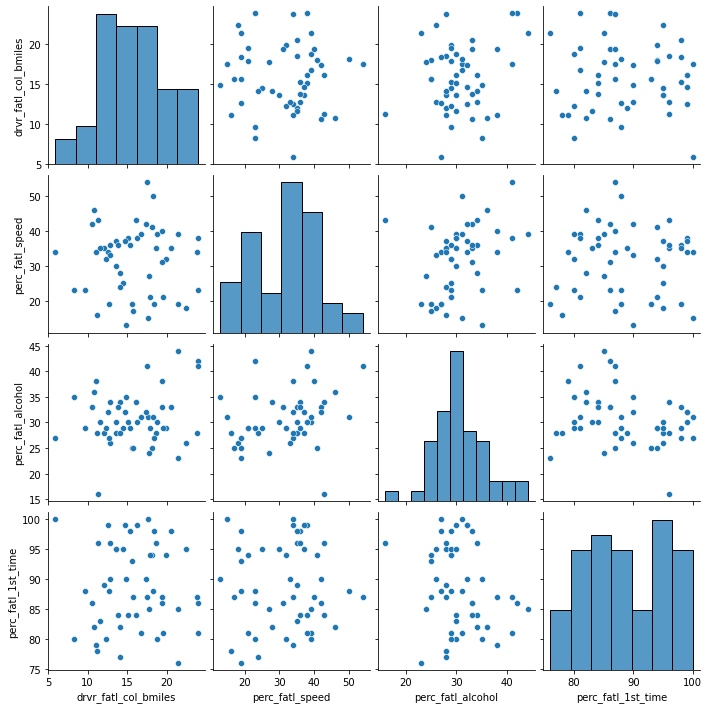

In [10]:
# Create a pairwise scatter plot to explore the data
sns.pairplot(road_acc)

###### Quantifying the association between features and target variable

In [11]:
from scipy.stats import pearsonr

In [19]:
cols_of_int = road_acc.columns[2:]

for col in cols_of_int:
    corr, p = pearsonr(road_acc.drvr_fatl_col_bmiles, road_acc[col])
    print('Pearson r correlation between drvr_fatl_col_bmiles and ' + col + ' is ' + str(corr))
    print('')

Pearson r correlation between drvr_fatl_col_bmiles and perc_fatl_speed is -0.029080145913990666

Pearson r correlation between drvr_fatl_col_bmiles and perc_fatl_alcohol is 0.19942634378011184

Pearson r correlation between drvr_fatl_col_bmiles and perc_fatl_1st_time is -0.017941876874043666



<p>We can already see some potentially interesting relationships between the target variable (the number of fatal accidents) and the feature variables (the remaining three columns).</p>
<p>To quantify the pairwise relationships that we observed in the scatter plots, we can compute the Pearson correlation coefficient matrix. The Pearson correlation coefficient is one of the most common methods to quantify correlation between variables, and by convention, the following thresholds are usually used:</p>
<ul>
<li>0.2 = weak</li>
<li>0.5 = medium</li>
<li>0.8 = strong</li>
<li>0.9 = very strong</li>
</ul>

In [21]:
# Compute the correlation coefficent for all column pairs
corr_columns = road_acc.corr()
corr_columns

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000
